# Double Pendulum Final Notebook

### Author: Ian Osborne, Class: Theoretical Mechanics 5300, Professor: Dick Furnstahl, Made: 4/24/2020

##### Purpose:A) Numerically solve the motion of a double pendulum system using the Euler-Lagrange equation and Lagrangian mechanics as a function of time.  B) Show the system is chaotic outside of the small angle aproximation.

## Lagrangian
The Lagrangian of a single, simple pendulum whith a massless arm-length $l$, and mass at the end, $m$, is: 

\begin{align}
    \mathcal{L}_1 = \frac{1}{2}m_1 l_1^2 \dot{\phi}_1^2 + m_1g\cos(\phi_1)
\end{align}

Where $\phi$ is the angle the pendulum makes with the vertical. Attaching another pendulum to the end of the first gives the following kinetic term for the second pendulum:

\begin{align}
    T = \frac{1}{2} m_2 l_1^2 \dot{\phi}_1^2 + m_2l_1l_2\dot{\phi}_1\dot{\phi}_2\cos(\phi_1-\phi_2) + \frac{1}{2}m_2l_2^2\dot{\phi}_2^2
\end{align}

The potential energy of the second pendulum is: 

\begin{align}
    U = -m_2g(l_1\cos(\phi_1) + l_2\cos(\phi_2))
\end{align}

Combining into one Lagrangian:

\begin{align}
    \mathcal{L} = \frac{1}{2} (m_1 + m_2) l_1^2 \dot{\phi}_1^2 + m_2l_1l_2\dot{\phi}_1\dot{\phi}_2\cos(\phi_1-\phi_2) + \frac{1}{2}m_2l_2^2\dot{\phi}_2^2  + (m_1+m_2)gl_1\cos(\phi_1) + m_2gl_2\cos(\phi_2)
\end{align}

## Euler-Lagrange
The Euler-Lagrange equation for each coordinate, $\phi_1, \phi_2$, gives the coupled equation of motion

\begin{align}
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\phi}_i} \right) = \frac{\partial \mathcal{L}}{\partial \phi_i}
\end{align}

Solving the coupled equations for $\ddot{\phi_1}$ and $\ddot{\phi_2}$ gives:

\begin{align}
    \ddot{\phi_1} &= -\frac{g (2 m_1 + m_2) \sin(\phi_1) + g m_2 \sin(\phi_1 - 2 \phi_2) + 
 2 m_2 \sin(\phi_1 - \phi_2) (l_1 \cos(\phi_1 - \phi_2) \dot{\phi}_1^2 + 
    l_2 \dot{\phi}_2^2)} {2l_1 (m_1 + m_2 - m_2 \cos(\phi_1 - \phi_2)^2)}\\
     \ddot{\phi_2} &= \frac{\sin(\phi_1 - \phi_2) \left((m_1 + m_2) (g \cos(\phi_1) + l_1 \dot{\phi}_1^2) + 
   l_2 m_2 \cos(\phi_1 - \phi_2) \dot{\phi}_2^2\right)}{l_2 (m_1 + m_2 - m_2 \cos(\phi_1 - \phi_2)^2)}
\end{align}

Solve for motion numerically usin the coupled differential equation:

\begin{align}
    \frac{d}{dt}\begin{pmatrix}
        \phi_1\\
        \dot{\phi}_1\\
        \phi_2\\
        \dot{\phi}_2
    \end{pmatrix} = 
    \begin{pmatrix}
        \dot{\phi}_1\\
        \ddot{\phi}_1\\
        \dot{\phi}_2\\
        \ddot{\phi}_2
    \end{pmatrix}
\end{align}

In [5]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
#import necessary libraries

In [15]:
class DoublePendulum():
    """
    DoublePendulum numerically solves the equation of motion for a double pendulum
    
    l1: Length of the first pendulum arm
    l2: Length of the second pendulum arm
    g: strength of gravity
    m1: mass on the joint of the first and second pendulum
    m2: mass at the end of the second pendulum arm
        
    
    """
    def __init__(self, l1=1., l2=1., m1=1, m2=1., g=1.
                ):
        self.l1 = l1
        self.l2 = l2
        self.g = g
        self.m1 = m1
        self.m2 = m2     
        
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt  d^2phi_1/dt^2  dphi_2/dt  d^2phi_2/dt^2]
    
        t : time 
        y : A 4-component vector with y[0] = phi_1(t), y[1] = dphi_1/dt y[2] = phi_2(t), y[3] = dphi_2/dt
        
        """
        return [y[1],
        -(self.g*(2*self.m1+self.m2)*np.sin(y[0]) + self.g*self.m2*np.sin(y[0]-2*y[2]) 
               + 2* self.m2 * np.sin(y[0]-y[2])*(self.l1 * np.cos(y[0] - y[2])*y[1]**2+ self.l2*y[3]**2))
               / (2*self.l1* (self.m1 + self.m2 - self.m2 * np.cos(y[0] - y[2])**2)), 
        y[3],
        (np.sin(y[0] - y[2]) *((self.m1 + self.m2)*(self.g * np.cos(y[0]) + self.l1*y[1]**2) 
               + self.l2 * self.m2 * np.cos(y[0] - y[2])*y[3]**2 ) ) / (self.l2 
                * (self.m1 + self.m2 - self.m2 * np.cos(y[0] - y[2])**2 )  )]
    
    
    
    def solve_ode(self, t_pts, phi_1_init, phi_dot_1_init, phi_2_init, phi_dot_2_init, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
       Solve for phi_1 and phi_2 and their derivatives
        """
        y = [phi_1_init, phi_dot_1_init, phi_2_init, phi_dot_2_init] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_dot_1, phi_2, phi_dot_2 = solution.y

        return phi_1, phi_2

In [34]:
#initialize DoublePendulum object
l1 = 1
l2 = 1
m1 = 1/2
m2 = 2
g = 1

x1 = DoublePendulum(l1, l2, m1, m2, g)

#generate t points
t_start = 0
t_end = 100
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

In [35]:
#set initial conditions
phi_1_init = np.pi/2.
phi_dot_1_init = -1
phi_2_init = 1
phi_dot_2_init = 1

#use class function to solve for phi_1 and phi_2

phi_1, phi_2 = x1.solve_ode(t_pts, phi_1_init, phi_dot_1_init, phi_2_init, phi_dot_2_init, 1.0e-9, 1.0e-9)

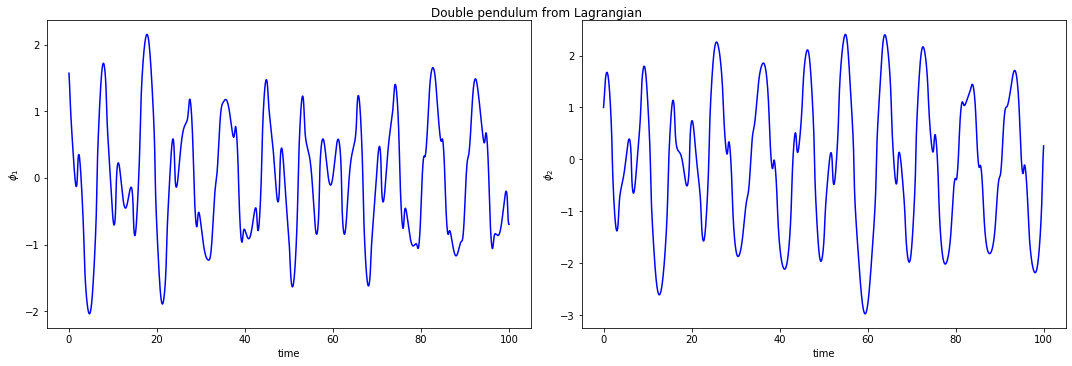

In [36]:
#plot phi_1 and phi_2 as a function of time
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian'
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi_1 plot 
ax_a = fig.add_subplot(1,2,1)                  
  
ax_a.plot(t_pts, phi_1, color='blue')
ax_a.set_xlabel('time')
ax_a.set_ylabel('$\phi_1$')
ax_a.set_label('First arm phi')
                              
# second plot: phi_2 plot 
ax_b = fig.add_subplot(1,2,2)                  

ax_b.plot(t_pts, phi_2, color='blue')
ax_b.set_xlabel('time')
ax_b.set_ylabel('$\phi_2$')
ax_b.set_label('Second arm phi')
                              


fig.tight_layout()

In [40]:
#check if the system is chaotic by looking at how the difference grows between two pendulums 
#with slightly different initial conditions

x2 = DoublePendulum(l1,l2,m1,m2,g)

delta_phi_1 = 1.0e-7

phi_1_new, phi_2_new = x2.solve_ode(t_pts, phi_1_init + delta_phi_1, phi_dot_1_init, 
                                    phi_2_init, phi_dot_2_init, 1.0e-9, 1.0e-9)



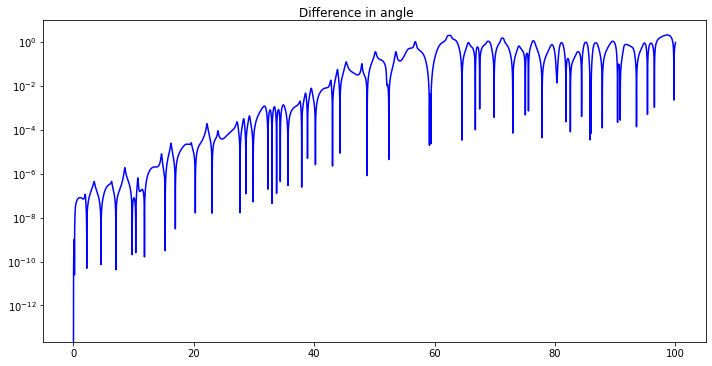

In [41]:
#plot the difference of phi_2 on a log scale

fig_1 = plt.figure(figsize=(10,5))
overall_title = 'Difference in angle'
fig_1.suptitle(overall_title, va='baseline')

ax_c = fig_1.add_subplot(1,1,1)
ax_c.semilogy(t_pts, np.abs(phi_2-phi_2_new), color = 'blue')

fig_1.tight_layout()

Even though the two double pendulums start with only a 1e-7 difference in the initial phi_2 coordinate,
the difference between the two phi_2s exponentially increases. Exponentially increasing differences 
with respect to initial conditions is a key characteristic of chaos. 